**Task 3**

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = '/content/BitCoin.csv'
bitcoin_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
bitcoin_data.head()


,Unnamed: 0,Open,Max,Min,Close,Volume,Margin,Date
0,0,357.00,364.98,356.00,362.06,627500.0,720.020,2015-01-01
1,1,363.00,369.88,363.00,367.85,1232500.0,731.865,2015-01-02
2,2,365.70,365.90,360.00,363.37,1228400.0,727.485,2015-01-05
3,3,361.00,362.48,356.10,356.84,1509000.0,718.210,2015-01-06
4,4,356.45,359.90,351.29,352.39,1524900.0,710.015,2015-01-07


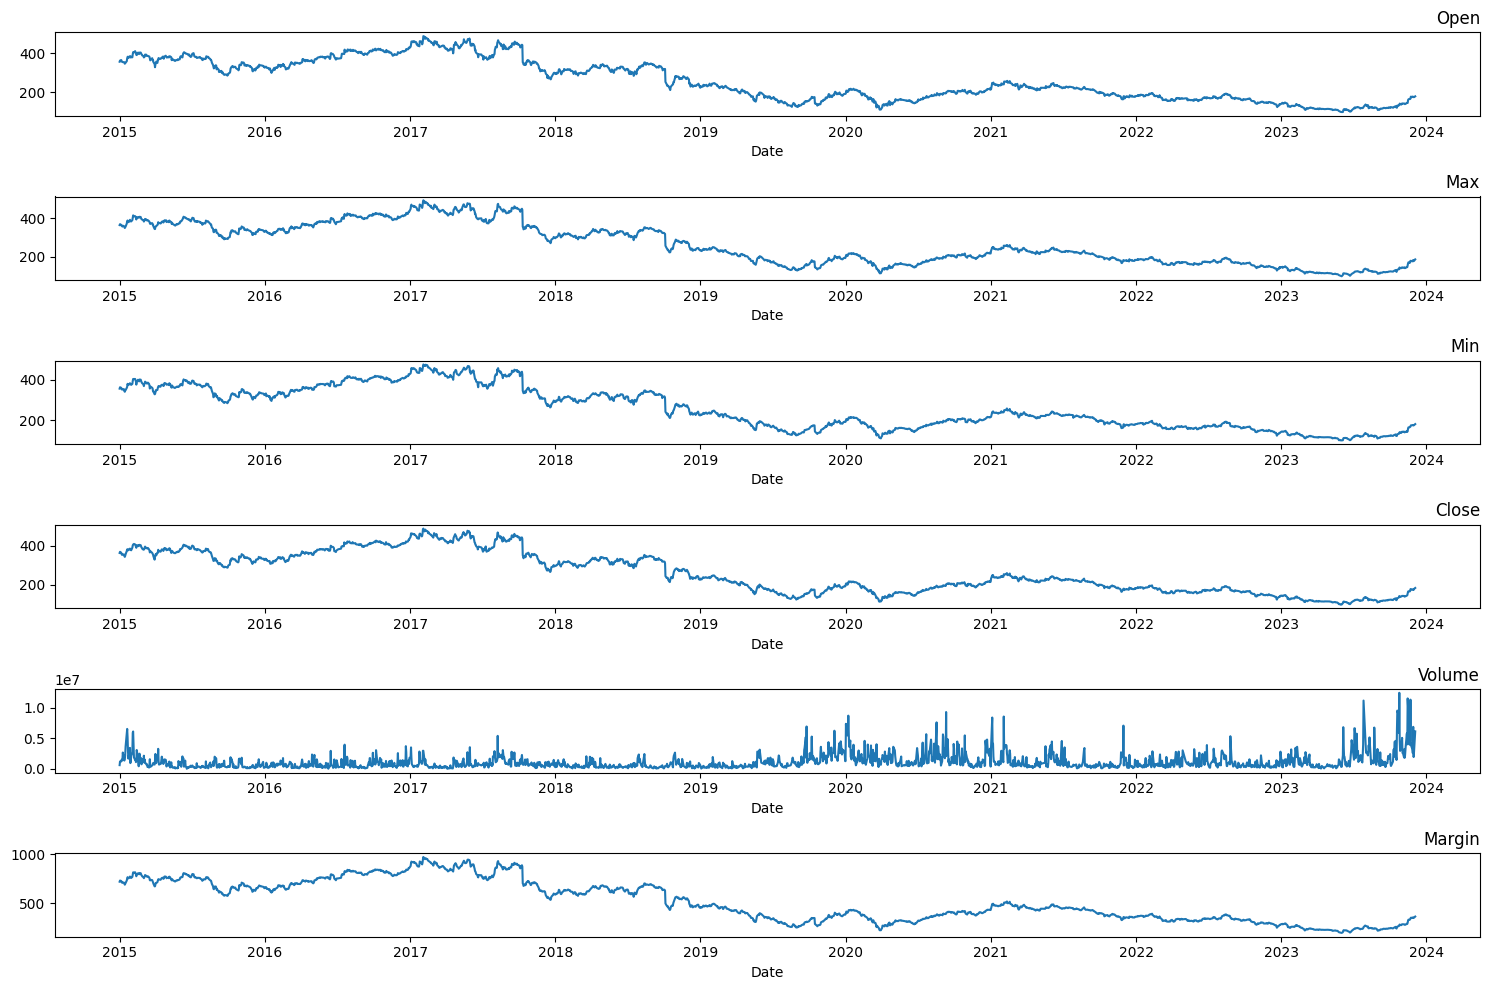

In [25]:
import matplotlib.pyplot as plt

# Converting 'Date' to datetime format for better plotting
bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Date'])

# Plotting trends of all features
features = ['Open', 'Max', 'Min', 'Close', 'Volume', 'Margin']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(len(features), 1, i)
    plt.plot(bitcoin_data['Date'], bitcoin_data[feature])
    plt.title(feature, loc='right')
    plt.xlabel('Date')

plt.tight_layout()
plt.show()


In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
from tensorflow.keras.optimizers import Adam

# Load the data
file_path = 'BitCoin.csv' # Change this to your file path in Google Colab
bitcoin_data = pd.read_csv(file_path)
margin_data = bitcoin_data['Margin'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(margin_data)

# Prepare the data with a sliding window of 50 time steps
def create_dataset(dataset, time_step=50):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 50
X, y = create_dataset(scaled_data, time_step)

# Reshape input to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Splitting the data into train and test sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

# Build the LSTM and GRU model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))
model.add(GRU(50))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=64, verbose=1)



Epoch 1/20
28/28 [==============================] - 11s 175ms/step - loss: 0.0565 - val_loss: 0.0083
Epoch 2/20
28/28 [==============================] - 3s 88ms/step - loss: 0.0042 - val_loss: 0.0021
Epoch 3/20
28/28 [==============================] - 3s 123ms/step - loss: 0.0012 - val_loss: 2.7495e-04
Epoch 4/20
28/28 [==============================] - 2s 74ms/step - loss: 0.0010 - val_loss: 2.8498e-04
Epoch 5/20
28/28 [==============================] - 2s 69ms/step - loss: 0.0011 - val_loss: 4.1267e-04
Epoch 6/20
28/28 [==============================] - 5s 166ms/step - loss: 9.4658e-04 - val_loss: 2.6536e-04
Epoch 7/20
28/28 [==============================] - 3s 105ms/step - loss: 9.0846e-04 - val_loss: 2.8857e-04
Epoch 8/20
28/28 [==============================] - 2s 72ms/step - loss: 8.8240e-04 - val_loss: 2.8634e-04
Epoch 9/20
28/28 [==============================] - 2s 66ms/step - loss: 8.5270e-04 - val_loss: 2.3888e-04
Epoch 10/20
28/28 [==============================] - 2s 66ms

In [29]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions back to original scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1, 1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1, 1))




14/14 [==============================] - 0s 15ms/step


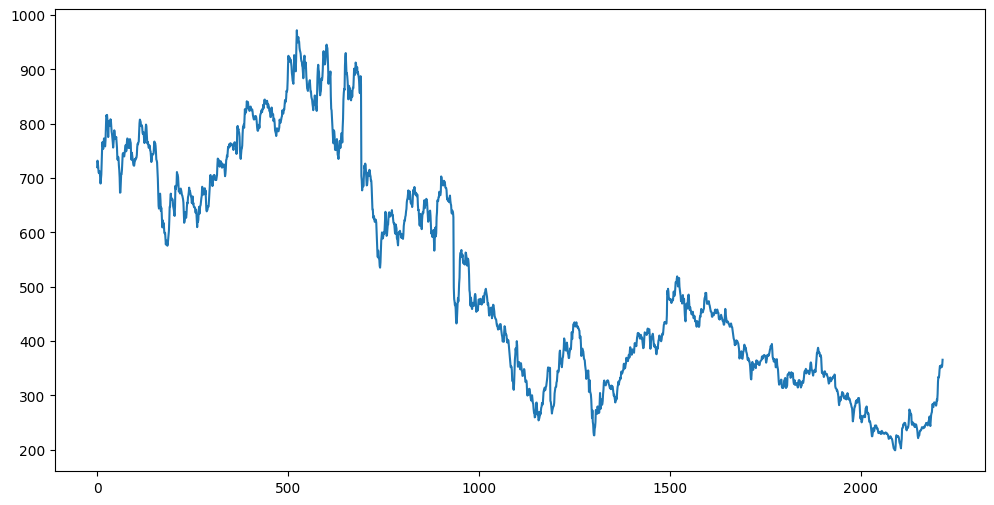

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(scaled_data), label='Original Data')

# Create empty arrays for plotting predictions
trainPredictPlot = np.empty_like(scaled_data)
trainPredictPlot[:, :] = np.nan
testPredictPlot = np.empty_like(scaled_data)
testPredictPlot[:, :] = np.nan

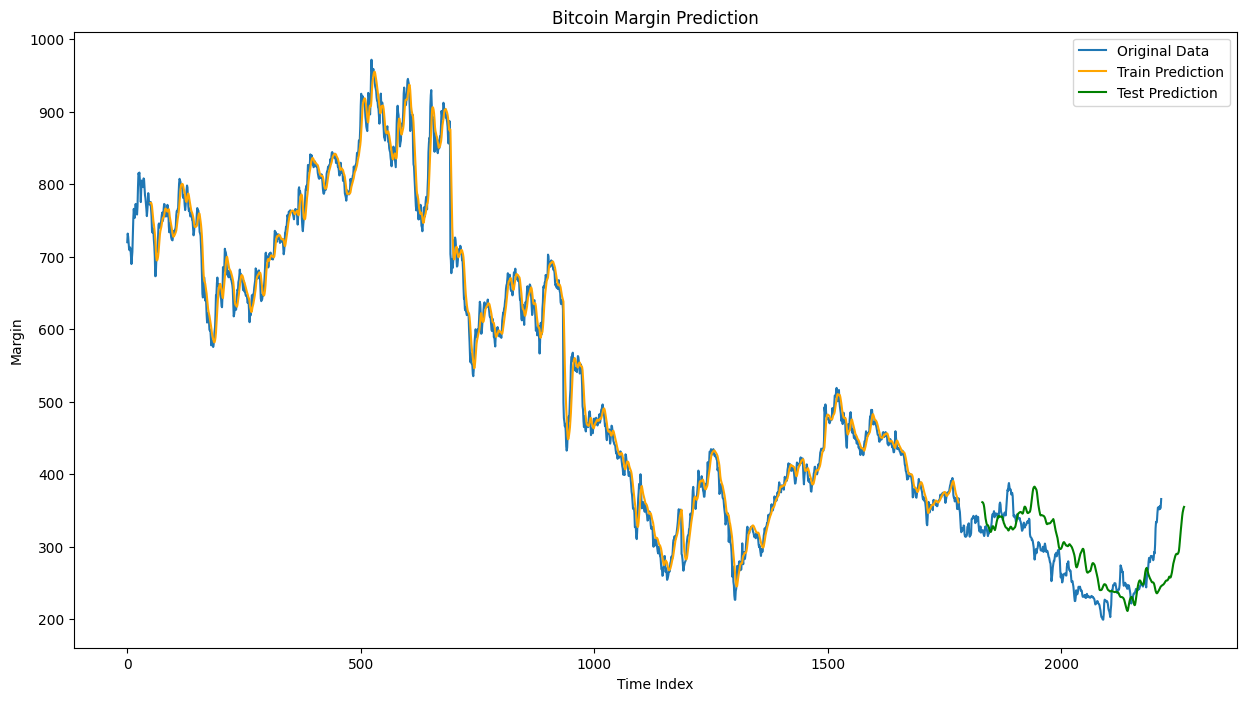

In [37]:
# Plotting
plt.figure(figsize=(15, 8))
original_dates = range(len(scaled_data))
plt.plot(original_dates, scaler.inverse_transform(scaled_data), label='Original Data')

# Calculate indices for train and test predictions
train_pred_indices = range(time_step, len(train_predict) + time_step)
test_pred_indices = range(test_start_index, test_end_index)

# Plot train and test predictions
plt.plot(train_pred_indices, train_predict, label='Train Prediction', color='orange')
plt.plot(test_pred_indices, test_predict, label='Test Prediction', color='green')

plt.title('Bitcoin Margin Prediction')
plt.xlabel('Time Index')
plt.ylabel('Margin')
plt.legend()
plt.show()
